In [1]:
print('all ok')

all ok


In [2]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,root_mean_squared_error

In [3]:
x,y= load_diabetes(return_X_y=True)

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [5]:
lr=LinearRegression()

lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
y_pred=lr.predict(x_test)

In [7]:
print("RMSE= ",root_mean_squared_error(y_test,y_pred))
print("R2 score= ",r2_score(y_test,y_pred))

RMSE=  55.751278769977965
R2 score=  0.3852693902152976


In [8]:
lr.coef_

array([ -53.9271644 , -228.97924355,  535.29346579,  350.36740549,
       -736.21177951,  427.42399227,   94.8028264 ,  184.23951707,
        721.91554934,  115.46088346])

In [9]:
lr.intercept_

np.float64(152.89572568540441)

In [22]:
from sklearn.linear_model import Ridge

R=Ridge(alpha=0.0005)

In [23]:
R.fit(x_train,y_train)

,alpha,0.0005
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [24]:
y_pred1=R.predict(x_test)

In [25]:
print("RMSE= ",root_mean_squared_error(y_test,y_pred1))
print("R2 score= ",r2_score(y_test,y_pred1))

RMSE=  55.75872731450025
R2 score=  0.38510511939348246


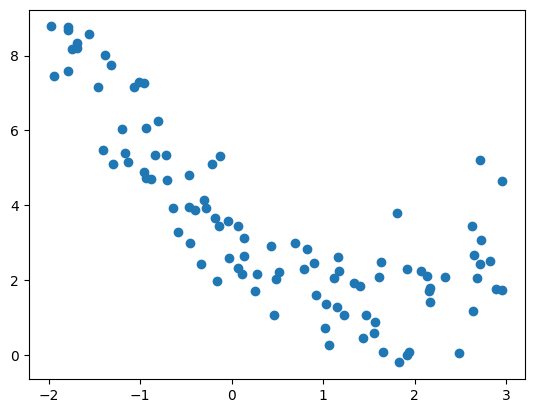

In [26]:
import numpy as np
import matplotlib.pyplot as plt

m=100
x1= 5 * np.random.rand(m,1) - 2
x2= 0.7 * x1 **2 -2 * x1 +3 + np.random.randn(m,1)

plt.scatter(x1,x2)
plt.show()

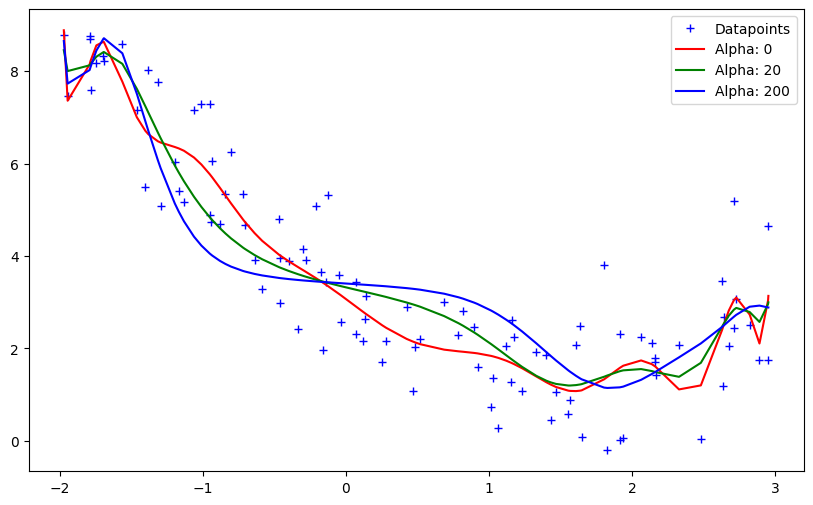

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_pred_ridge(x1,x2, alpha):
    model=Pipeline([
        ('poly_features', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1,x2)
    return model.predict(x1)

alphas=[0,20,200]
cs=['r','g','b']

plt.figure(figsize=(10,6))
plt.plot(x1,x2,'b+',label='Datapoints')

for alpha,c in zip(alphas,cs):
    preds=get_pred_ridge(x1,x2,alpha)

    plt.plot(sorted(x1[:,0]), preds[np.argsort(x1[:,0])],c, label=f'Alpha: {alpha}')

plt.legend()
plt.show()

### Ridge Regression on random samples

In [28]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [33]:

x,y=make_regression(n_samples=100,n_features=1,n_targets=1,n_informative=1,noise=20,random_state=13)

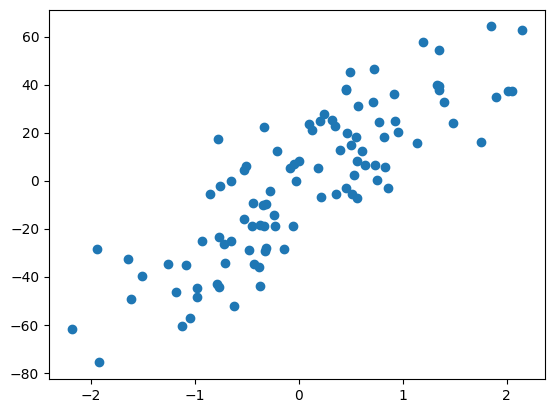

In [34]:
plt.scatter(x,y)

In [35]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(x,y)

print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [36]:
from sklearn.linear_model import Ridge

R=Ridge(alpha=10)
R.fit(x,y)

,alpha,10
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [37]:
print(R.coef_)
print(R.intercept_)

[24.9546267]
-2.1269130035235735


In [38]:
R1=Ridge(alpha=100)
R1.fit(x,y)
print(R1.coef_)
print(R1.intercept_)

[12.93442104]
-1.4248441496033308


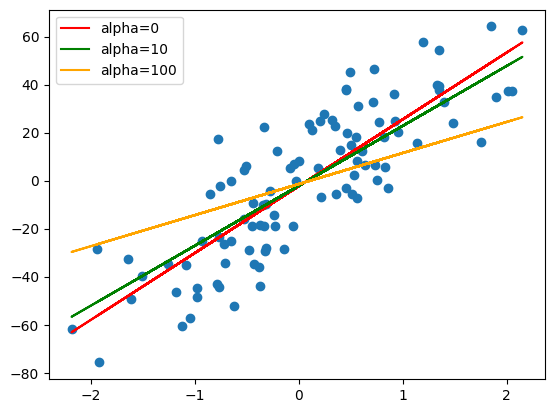

In [39]:
plt.scatter(x,y)
plt.plot(x,lr.predict(x),color='red',label='alpha=0')
plt.plot(x,R.predict(x),color='green',label='alpha=10')
plt.plot(x,R1.predict(x),color='orange',label='alpha=100')

plt.legend()
plt.show()

### develop Ridge class

In [40]:
class MyRidge:
    def __init__(self,alpha=0.1):
        self.m=None
        self.b=None
        self.alpha =alpha

    def fit(self,x_train,y_train):
        num=0
        den=0
        for i in range(x_train.shape[0]):
            num=num + ((y_train[i]- y_train.mean()) * (x_train[i] - x_train.mean()))
            den= den + ((x_train[i] - x_train.mean()) * (x_train[i] - x_train.mean()))

        self.m=num / (den + self.alpha)
        self.b= y_train.mean() - (self.m * x_train.mean())

        print(self.m)
        print(self.b)

    def predict(self, x_text):
        return self.m * x_text + self.b

In [41]:
myr=MyRidge(alpha=10)


In [43]:
myr.fit(x, y)

[24.9546267]
[-2.126913]


### Ridge using multi-dimention data

In [44]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [45]:
x,y=load_diabetes(return_X_y=True)

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [57]:
rid=Ridge(alpha=0.1,solver='cholesky')

In [58]:
rid.fit(x_train,y_train)

y_pred=rid.predict(x_test)

In [59]:
r2_score(y_test,y_pred)

0.4693128853309805

In [60]:
rid.coef_

array([  44.02063391, -241.69329987,  452.98665299,  332.04420177,
        -76.33686744,  -68.52143809, -164.98809083,  149.96908118,
        431.61347417,   58.51862681])

In [61]:
rid.intercept_

np.float64(150.89053425602808)

### Own class for Ridge (multi-dimension)

In [92]:

class MyNRidge:
    def __init__(self,alpha=0.1):
        self.intercept_=None
        self.coef_=None
        self.alpha =alpha

    def fit(self,x_train,y_train):
        x_train=np.insert(x_train,0,1,axis=1)
        I=np.identity(x_train.shape[1])
        I[0][0]=0
        result=np.linalg.inv(np.dot(x_train.T,x_train) + self.alpha * I).dot(x_train.T).dot(y_train)
        self.intercept_=result[0]
        self.coef_=result[1:]

        print(self.intercept_)
        print(self.coef_)

    def predict(self, x_text):
        return np.dot( x_text,self.coef_ ) + self.intercept_

In [93]:
mrn=MyNRidge(alpha=0.1)

In [94]:
mrn.fit(x_train,y_train)

150.8905342560281
[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]


In [95]:
y_pred_1=mrn.predict(x_test)

In [96]:
r2_score(y_test,y_pred_1)

0.4693128853309805

In [64]:
np.insert(x_train,0,1,axis=1)

array([[ 1.        ,  0.0090156 , -0.04464164, ...,  0.02323852,
         0.05568623,  0.10661708],
       [ 1.        ,  0.03081083,  0.05068012, ...,  0.05755657,
         0.0354587 ,  0.08590655],
       [ 1.        ,  0.01628068, -0.04464164, ..., -0.03949338,
        -0.05947118, -0.06735141],
       ...,
       [ 1.        ,  0.04170844,  0.05068012, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [ 1.        ,  0.01628068,  0.05068012, ..., -0.03949338,
         0.01703607,  0.00720652],
       [ 1.        ,  0.04897352,  0.05068012, ...,  0.07120998,
         0.03243232,  0.04862759]])

### Ridge using Gradient Descent

In [97]:
## SGDRegressor

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

In [98]:
x,y=load_diabetes(return_X_y=True)

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [100]:
sgd=SGDRegressor(penalty='l2',alpha=0.001,max_iter=500,eta0=0.1,learning_rate='constant')

In [101]:
sgd.fit(x_train,y_train)
y_pred=sgd.predict(x_test)

print("r2 score= ",r2_score(y_test,y_pred))
print("coef=",sgd.coef_)
print("intercept=",sgd.intercept_)

r2 score=  0.4588797402104051
coef= [  48.84994391 -159.14916391  369.03097208  271.62929541   -4.1740974
  -58.94069821 -166.88595174  137.46244324  334.71798353   96.87016716]
intercept= [153.16935366]


In [102]:
## Using Ridge

In [103]:
from sklearn.linear_model import Ridge

rig=Ridge(solver='sparse_cg',alpha=0.001,max_iter=500)

In [104]:
rig.fit(x_train,y_train)
y_pred=rig.predict(x_test)

print("r2 score= ",r2_score(y_test,y_pred))
print("coef=",rig.coef_)
print("intercept=",rig.intercept_)

r2 score=  0.46250101619914563
coef= [  34.52192544 -290.84084076  482.40181344  368.0678662  -852.44873179
  501.59160336  180.11115788  270.76333979  759.73534372   37.4913546 ]
intercept= 151.10198517439466


### Own class for Ridge using GD

In [105]:
class MyRidgeGD:
    def __init__(self,epoch=500,alpha=0.1,learning_rate=0.01):
        self.epoch=epoch
        self.alpha=alpha
        self.lr=learning_rate
        self.coef_=None
        self.intercept_=None

    def fit(self,x_train,y_train):
        self.coef_=np.ones(x_train.shape[1])
        self.intercept_=0
        b=np.insert(self.coef_,0,self.intercept_)

        x_train=np.insert(x_train,0,1,axis=1)

        for i in range(self.epoch):
            b_der=np.dot(x_train.T,x_train).dot(b) - np.dot(x_train.T,y_train) + (self.alpha * b)

            b=b - (self.lr * b_der)
        
        self.coef_=b[1:]
        self.intercept_=b[0]

    def predict(self,x_test):
        return np.dot(x_test,self.coef_) + self.intercept_


In [106]:
mrg=MyRidgeGD(epoch=500,alpha=0.1,learning_rate=0.005)

In [107]:
mrg.fit(x_train,y_train)

In [108]:
mrg.intercept_

np.float64(150.89809149744082)

In [109]:
mrg.coef_

array([  47.8928484 , -197.86571816,  423.79213305,  306.54003501,
        -20.38922305,  -83.03079333, -183.59379871,  143.93520283,
        376.90337262,   97.50517127])

In [110]:
y_pred_2=mrg.predict(x_test)

In [111]:
r2_score(y_test,y_pred)

0.46250101619914563

### 1. Impact on coefficients

In [112]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [113]:
data=load_diabetes()

In [114]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df['Target']=data.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [116]:

x_train,x_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.2,random_state=12)

In [117]:
coef=[]
r2_scores=[]
alphas=[0,10,100,1000]

for alpha in alphas:
    rid=Ridge(alpha=alpha)
    rid.fit(x_train,y_train)

    r2_values=r2_score(y_test,rid.predict(x_test))
    r2_scores.append(r2_values)
    coef.append(rid.coef_.tolist())

In [119]:
len(coef)

4

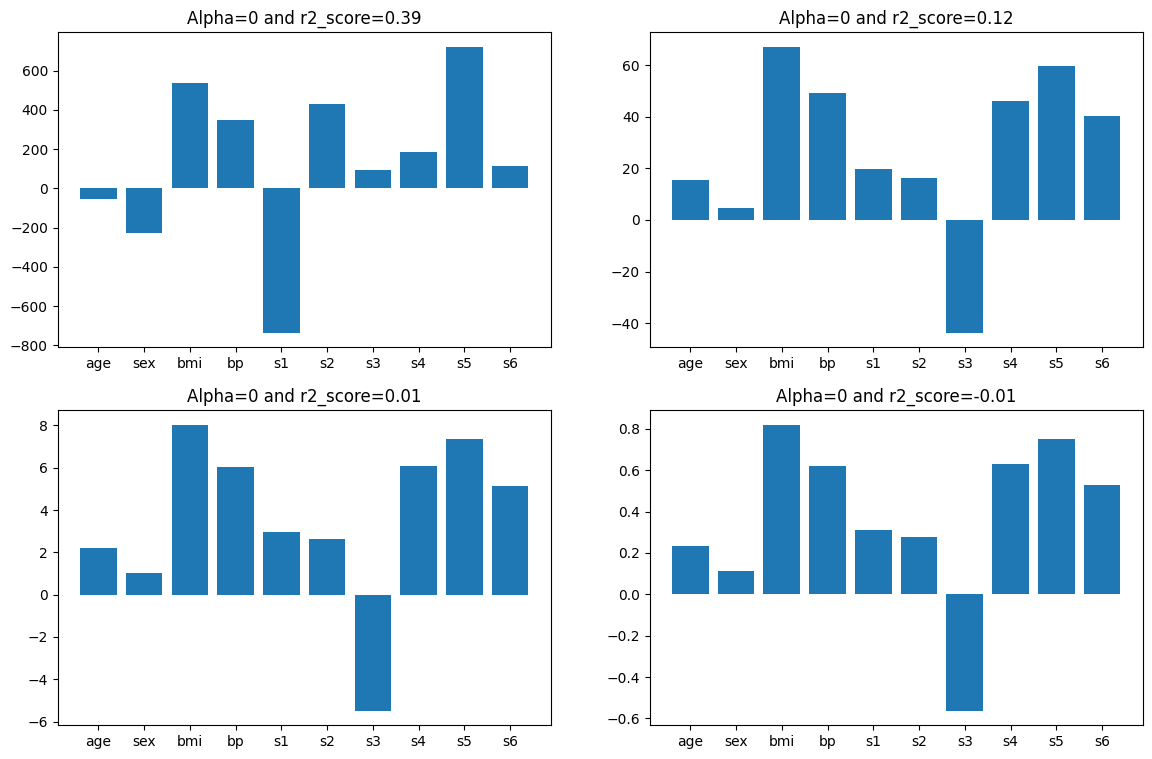

In [120]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coef[0])
plt.title(f'Alpha=0 and r2_score={round(r2_scores[0],2)}')

plt.subplot(222)
plt.bar(data.feature_names,coef[1])
plt.title(f'Alpha=0 and r2_score={round(r2_scores[1],2)}')

plt.subplot(223)
plt.bar(data.feature_names,coef[2])
plt.title(f'Alpha=0 and r2_score={round(r2_scores[2],2)}')

plt.subplot(224)
plt.bar(data.feature_names,coef[3])
plt.title(f'Alpha=0 and r2_score={round(r2_scores[3],2)}')

plt.show()

### 2. impact on Higher value coef

In [121]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(x_train,y_train)
    
    coefs.append(reg.coef_.tolist())

In [122]:
input_array = np.array(coefs)

In [123]:
coef_df = pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,-53.927164,-228.979244,535.293466,350.367405,-736.211780,427.423992,94.802826,184.239517,721.915549,115.460883
0.0001,-53.877636,-228.902651,535.312910,350.345573,-726.045559,419.401724,90.236740,182.995874,717.967438,115.515136
0.0010,-53.467934,-228.252117,535.408669,350.136845,-646.155895,356.379202,54.398663,173.286102,686.867918,115.957578
0.0100,-50.841418,-223.340142,533.186208,347.568420,-315.490754,96.555138,-92.107068,135.667877,554.879938,118.510605
0.1000,-36.239674,-188.794556,493.652852,321.291272,-65.174172,-77.392914,-186.521528,124.934822,416.299786,128.517409
1.0000,13.974692,-54.797228,291.101457,196.304553,14.639925,-13.906256,-149.411931,124.369073,234.674178,122.678425
10.0000,15.323082,4.469358,67.127195,49.306202,19.823250,16.143784,-43.806296,46.071608,59.476122,40.112819
100.0000,2.221679,1.038417,8.032568,6.039425,2.975759,2.620676,-5.497364,6.083724,7.344778,5.149204
1000.0000,0.231544,0.111983,0.820322,0.618453,0.311327,0.276055,-0.564376,0.628174,0.752906,0.530008


In [124]:
input_array = np.array(coefs).T

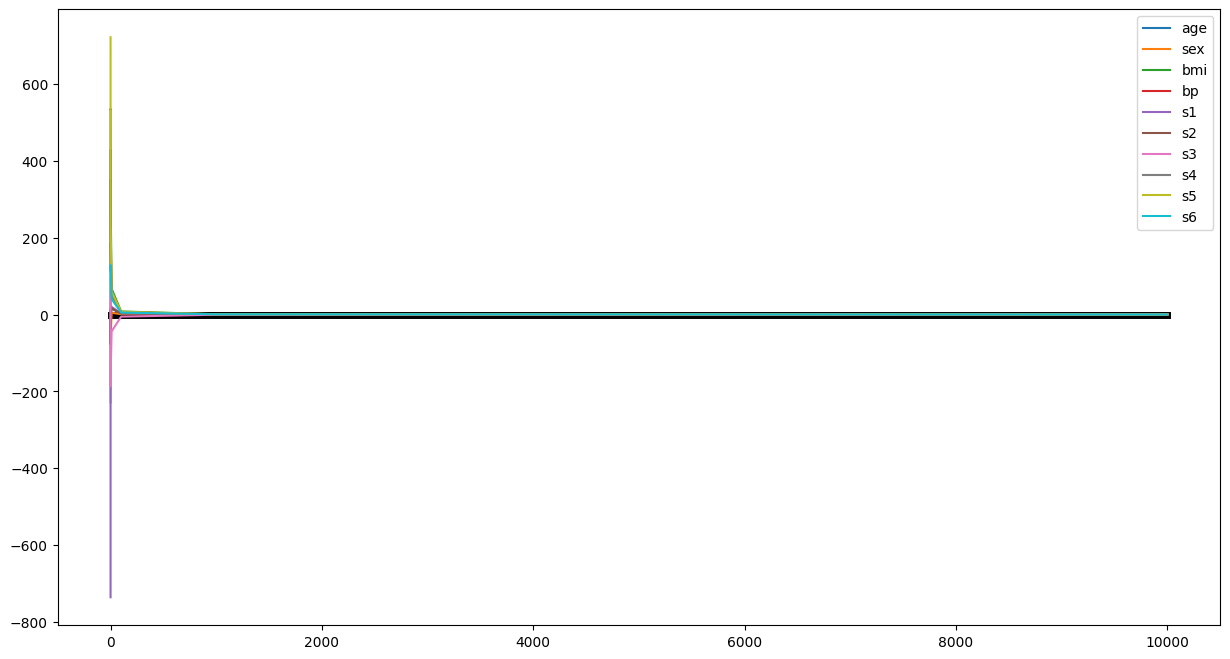

In [125]:
plt.figure(figsize=(15,8))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas,input_array[i],label=data.feature_names[i])
plt.legend()

### 3. imapct on Bias variance trade off

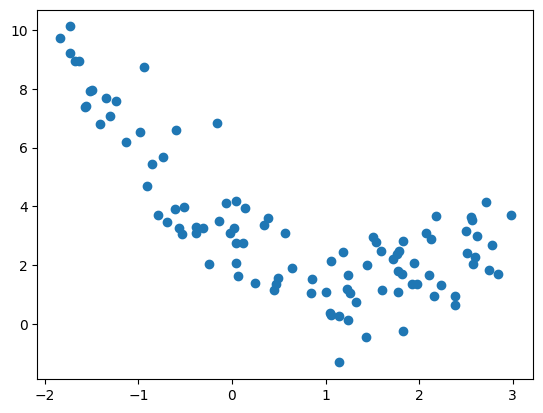

In [126]:
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [128]:
X_train,X_test,y_train,y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)

In [129]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=15)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [130]:
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0,30,100)

loss = []
bias = []
variance = []

for i in alphas:
    reg = Ridge(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

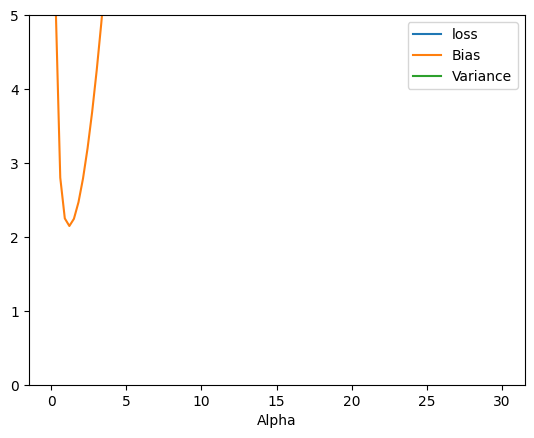

In [134]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='Bias')
plt.plot(alphas,variance,label='Variance')
plt.ylim(0,5)
plt.xlabel('Alpha')
plt.legend()

[27.82809103]
-2.29474455867698


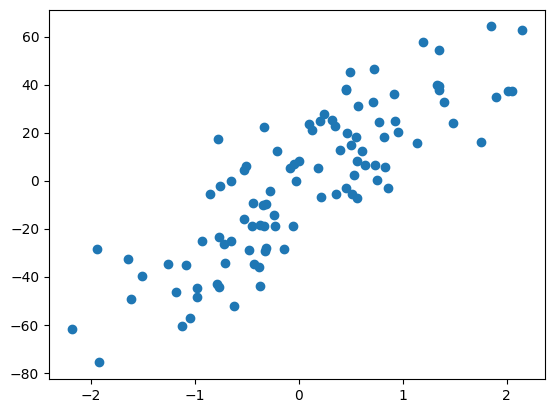

In [135]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

In [ ]:
def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*m*m

In [137]:
def predict(m):
    return m*X - 2.29

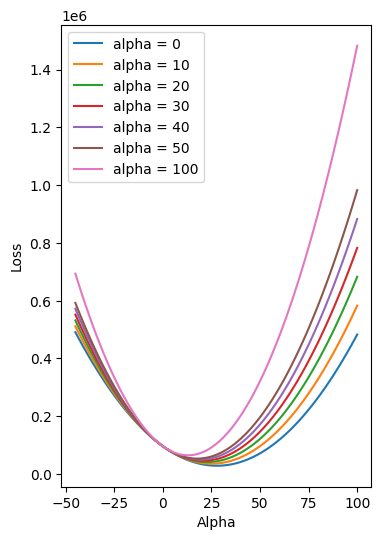

In [138]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(4,6))
for j in [0,10,20,30,40,50,100]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Loss')
plt.show()